#Loan Application Status Prediction
Problem Statement:
This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 

Independent Variables:

- Loan_ID

- Gender

- Married

- Dependents

- Education

- Self_Employed

- ApplicantIncome

- CoapplicantIncome

- Loan_Amount

- Loan_Amount_Term

- Credit History

- Property_Area

Dependent Variable (Target Variable):

- Loan_Status

You have to build a model that can predict whether the loan of the applicant will be approved or not on the basis of the details provided in the dataset. 

In [1]:
!pip install mlrose
!pip install scikit-pyplot
import six
import sys
sys.modules['sklearn.externals.six']=six
import mlrose
from imblearn.over_sampling import SMOTE
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings(('ignore'))
!pip install mlrose
!pip install scikit-pyplot
import six
import sys
sys.modules['sklearn.externals.six']=six
import mlrose
from imblearn.over_sampling import SMOTE

ERROR: Could not find a version that satisfies the requirement scikit-pyplot (from versions: none)
ERROR: No matching distribution found for scikit-pyplot


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


ERROR: Could not find a version that satisfies the requirement scikit-pyplot (from versions: none)
ERROR: No matching distribution found for scikit-pyplot


In [2]:
data=pd.read_csv('/content/Loan Application Status Prediction.csv')

In [3]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [4]:
data.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

**i have missing values for categorical column i will fill it by mode and for continuous i fill it by mean**

In [5]:
data['Gender']=data['Gender'].fillna(data['Gender'].mode()[0])

In [6]:
data['Married']=data['Married'].fillna(data['Married'].mode()[0])

In [7]:
data['Dependents']=data['Dependents'].fillna(data['Dependents'].mode()[0])

In [8]:
data['Self_Employed']=data['Self_Employed'].fillna(data['Self_Employed'].mode()[0])

In [9]:
data['LoanAmount']=data['LoanAmount'].fillna(data['LoanAmount'].mean())

In [10]:
data['Loan_Amount_Term']=data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0])

In [11]:
data['Credit_History']=data['Credit_History'].fillna(data['Credit_History'].mode()[0])

**I am dropping loan id because it is having all the unique values**

In [12]:
data.drop('Loan_ID',axis=1,inplace=True)

In [13]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.410423,0.855049
std,6109.041673,2926.248369,84.037468,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [15]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


#EDA

#Univariate Analysis

In [16]:
col=['Gender','Married','Dependents','Education','Self_Employed','Loan_Amount_Term','Credit_History','Property_Area','Loan_Status']

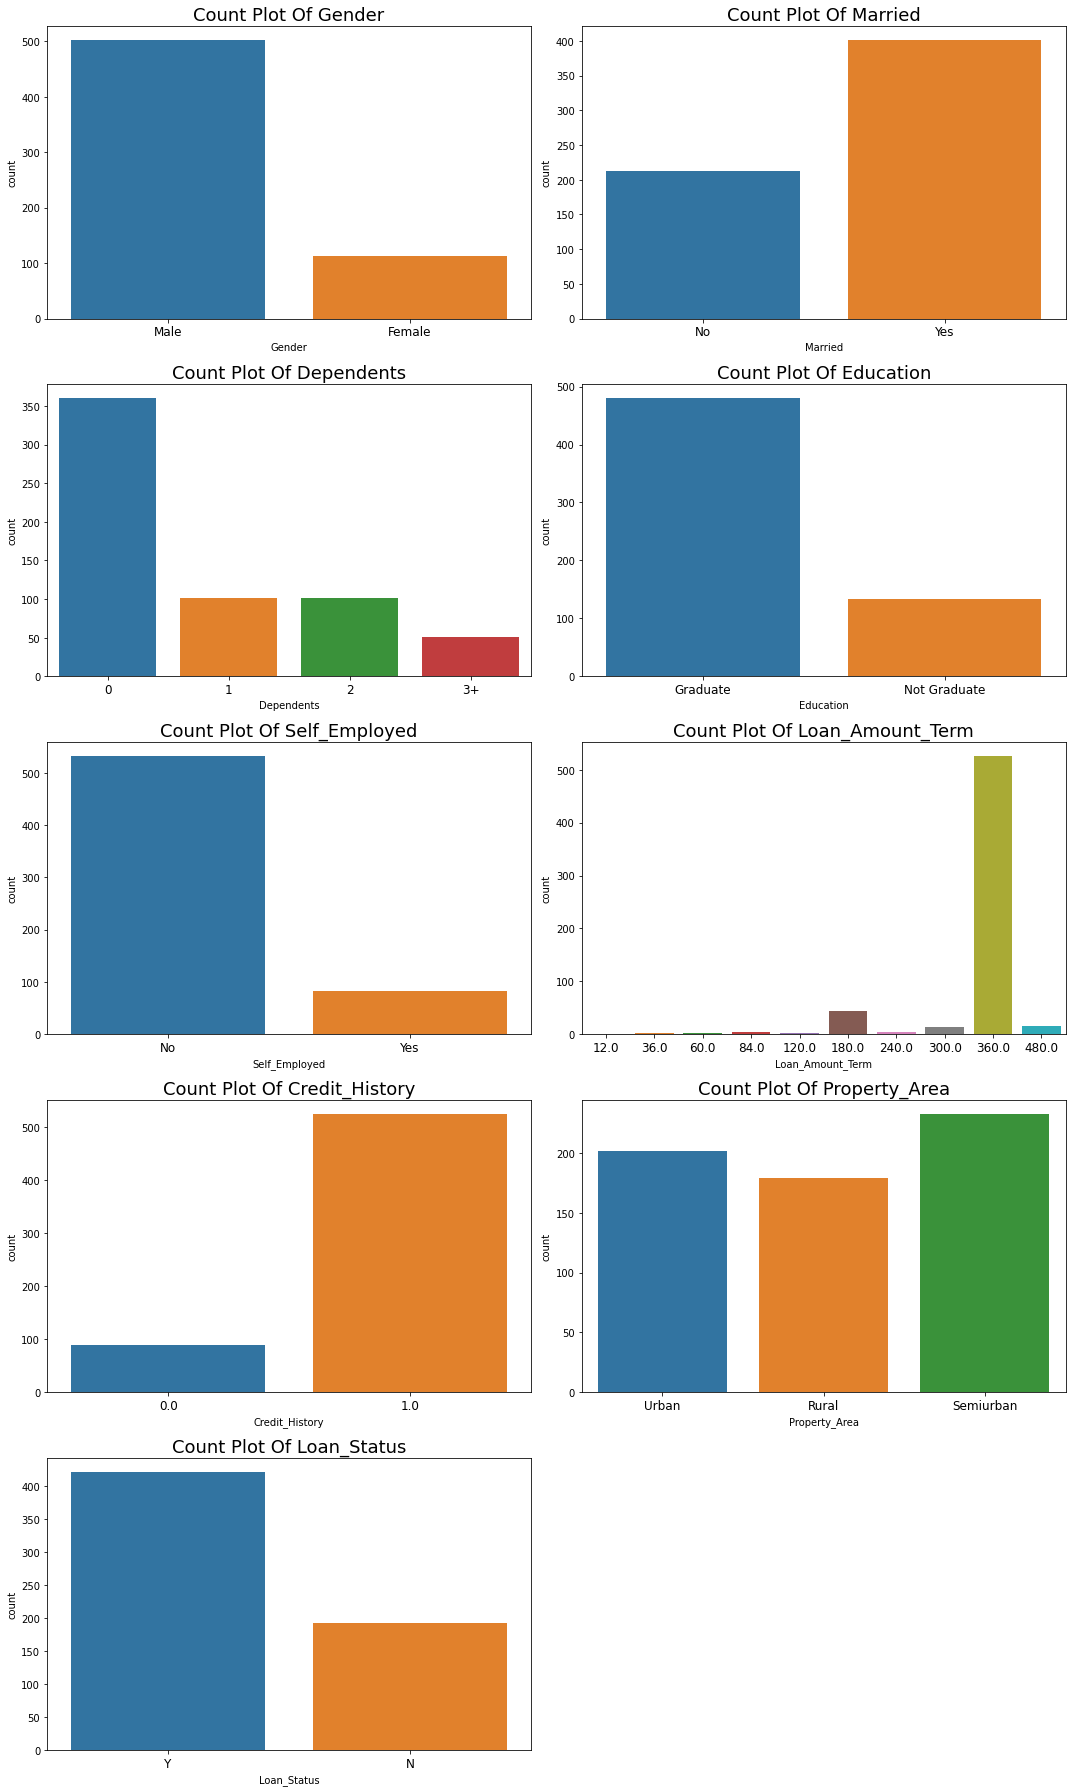

In [17]:
plt.figure(figsize=(15,25))
for i in range(len(col)):
  plt.subplot(5,2,i+1)
  sns.countplot(data[col[i]])
  plt.title(f"Count Plot Of {col[i]}",fontsize=18)
  plt.xticks(fontsize=12)
  plt.tight_layout()

#Observation
1-From Gender i can say The count of male is high and female has low count

2-From married countplot i can say people who are married are more as compare to single

3-From Countplot of dependents i can say 0 has high count and 3+ has the lowest count

4-From countplot of Education i can say people who are graduated are having more and people who are not graduated have less count

5-From Countplot of Self_employed i can say people who are not self employed have high count as compare to self employed people

6-from countplot of loan amount term 360 has the highest count and other has a very few count

7-Countplot of credit history where 1 has high count and 0 has less count

8-From Countplot of property area semiurban has the highest count and then Urban has the highest count and rural has least count

9-From COuntplot of loan status i can say Yes has the high count and N has the less count as compare to Yes

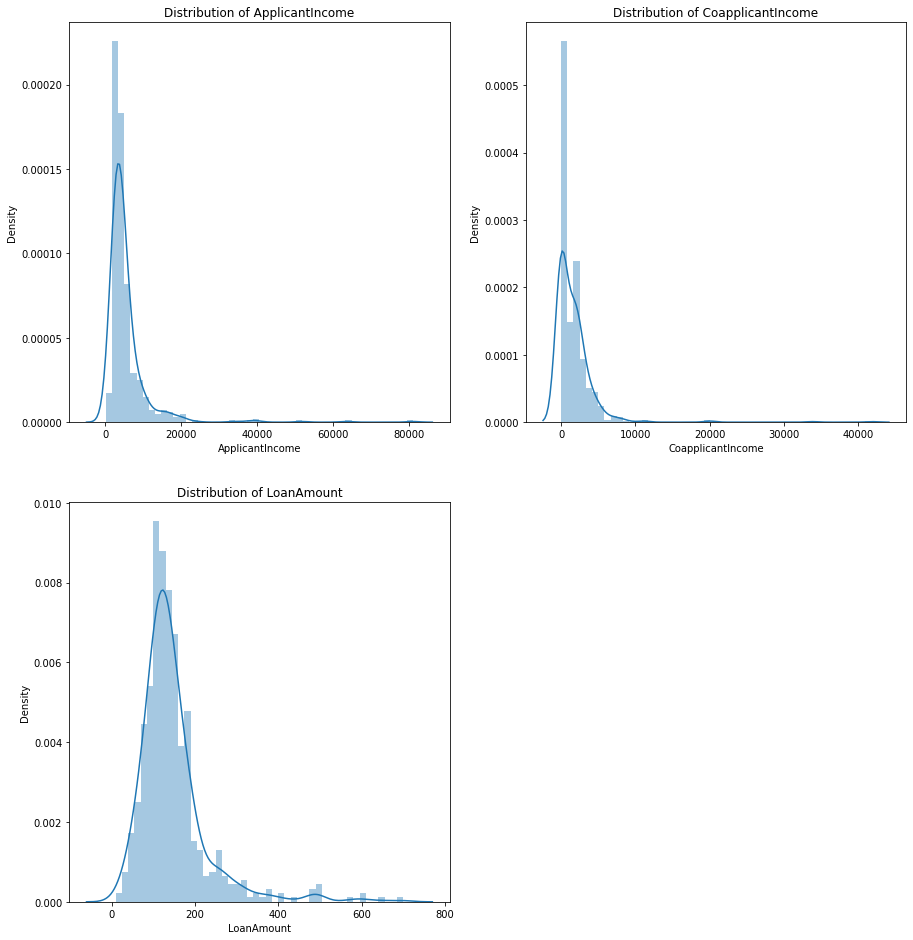

In [18]:
col2=['ApplicantIncome','CoapplicantIncome','LoanAmount']
plt.figure(figsize=(15,25))
for i in range(len(col2)):
  plt.subplot(3,2,i+1)
  sns.distplot(data[col2[i]])
  plt.title(f"Distribution of {col2[i]}")

#Observation
1-from applicant income and CoapplicantIncome i can say bith have left peak 

2-From Loanamount i can say it is right skewed 

#Bivariate Analysis

In [19]:
col3=['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area']

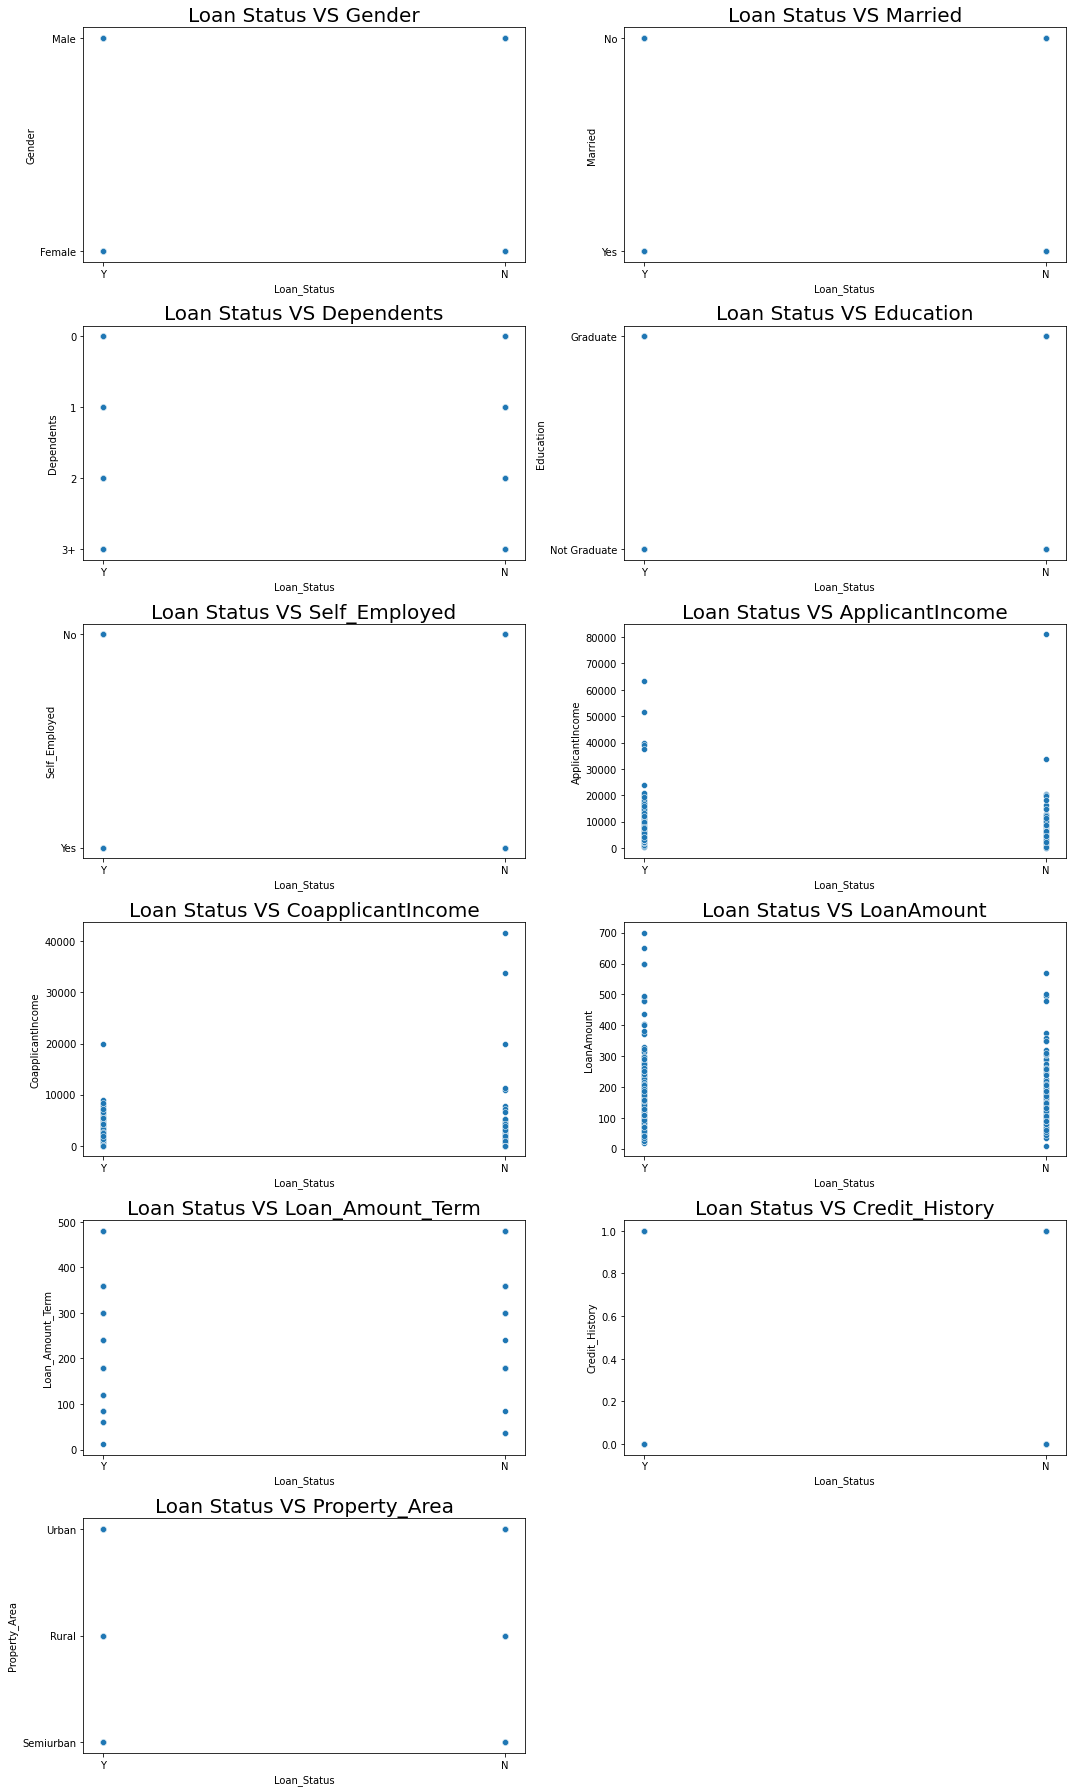

In [20]:
plt.figure(figsize=(15,25))
for i in range(len(col3)):
  plt.subplot(6,2,i+1)
  sns.scatterplot(x=data['Loan_Status'],y=data[col3[i]])
  plt.title(f"Loan Status VS {col3[i]}",fontsize=20)
  plt.tight_layout()

#Observation
1-From applicantincome and loan status i can say more the income of peoples they take less lone and less the income of people they take loan

2-from coapplicantincome i can say more the people are they who dont want loan as compare to yes

3-From loanamount i can say people with loan status are high as compare to no loan

In [21]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [22]:
co=['ApplicantIncome','LoanAmount']

In [23]:
data0=data.groupby('Self_Employed')['LoanAmount'].count()
data0=data0.reset_index()
data0=data0.sort_values(by=('LoanAmount'),ascending=False)

In [24]:
data0

,Self_Employed,LoanAmount
0,No,532
1,Yes,82


(array([0, 1]), <a list of 2 Text major ticklabel objects>)

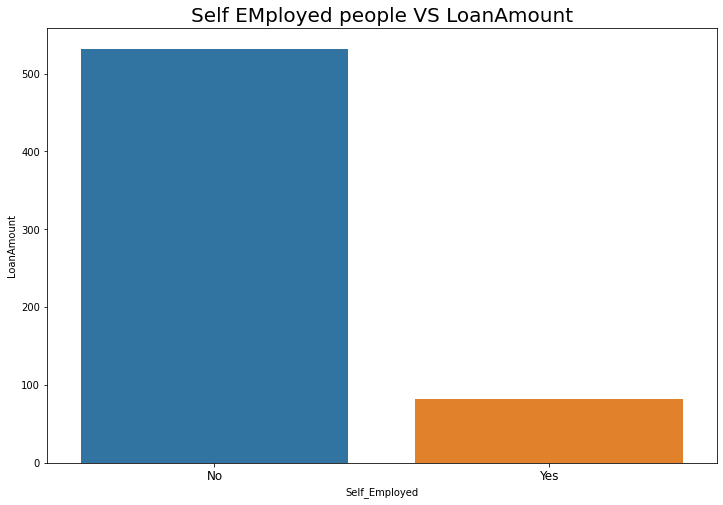

In [25]:
plt.figure(figsize=(12,8))
plt.title("Self EMployed people VS LoanAmount",fontsize=20)
sns.barplot(x='Self_Employed',y='LoanAmount',data=data0)
plt.xticks(fontsize=12)

#From upper graph i can say people who are not self emplopyed take more amount

In [26]:
data1=data.groupby('Loan_Amount_Term')['LoanAmount'].count()
data1=data1.reset_index()
data1=data1.sort_values(by=('LoanAmount'),ascending=False)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

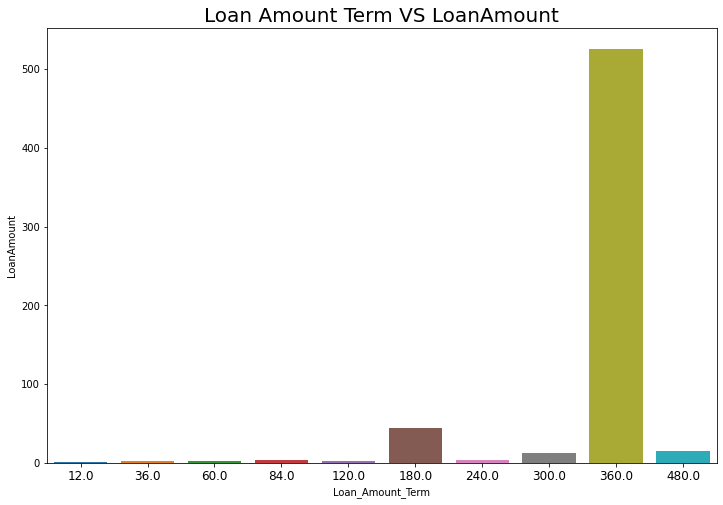

In [27]:
plt.figure(figsize=(12,8))
plt.title("Loan Amount Term VS LoanAmount",fontsize=20)
sns.barplot(x='Loan_Amount_Term',y='LoanAmount',data=data1)
plt.xticks(fontsize=12)

#Observation
from upper observation i can say the Loan Amount term of 360 has the highest loanamount count 

In [28]:
data2=data.groupby('Property_Area')['LoanAmount'].count()
data2=data2.reset_index()

In [29]:
data2

,Property_Area,LoanAmount
0,Rural,179
1,Semiurban,233
2,Urban,202


Text(0.5, 1.0, 'AREA VS Loan Amount')

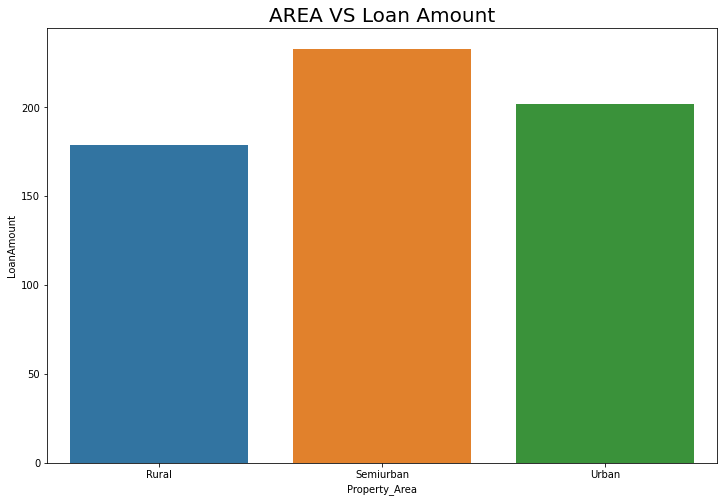

In [30]:
plt.figure(figsize=(12,8))
sns.barplot(x='Property_Area',y='LoanAmount',data=data2)
plt.title("AREA VS Loan Amount",fontsize=20)

#Observation
From upper graph i can say prople from semiurban take more loan and then urban people and them rural

In [31]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


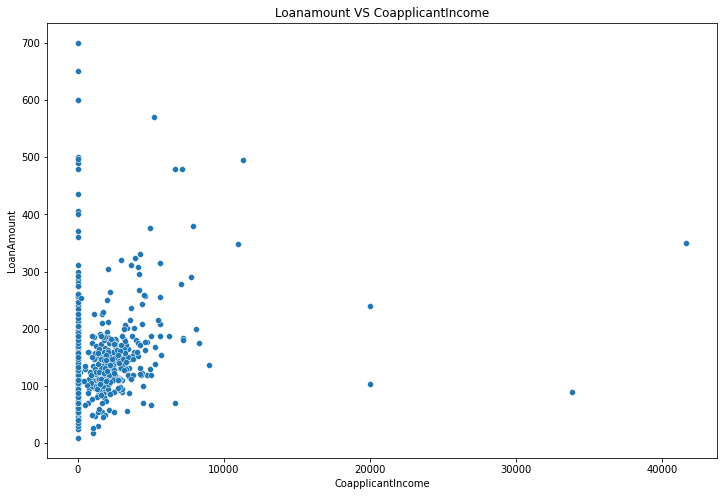

In [32]:
plt.figure(figsize=(12,8))
plt.title("Loanamount VS CoapplicantIncome")
sns.scatterplot(y='LoanAmount',x='CoapplicantIncome',data=data)

**From upper plot i can say people who have income betwween 0-10000 took more loan and people who have income more then 10000 took almost no loan**

In [33]:
data3=data.groupby('Dependents')['LoanAmount'].apply(lambda x:x.mean())
data3=data3.reset_index()
data3=data3.sort_values(by=('LoanAmount'),ascending=False)

In [34]:
data4=data.groupby('Dependents')['CoapplicantIncome'].apply(lambda x:x.mean())
data4=data4.reset_index()
data4=data4.sort_values(by=('CoapplicantIncome'),ascending=False)

In [35]:
data5=data.groupby('Property_Area')['CoapplicantIncome'].apply(lambda x:x.mean())
data5=data5.reset_index()
data5=data5.sort_values(by=('CoapplicantIncome'),ascending=False)

In [36]:
data6=data.groupby('Property_Area')['LoanAmount'].apply(lambda x:x.mean())
data6=data6.reset_index()
data6=data6.sort_values(by=('LoanAmount'),ascending=False)

In [37]:
data7=data.groupby('Gender')['CoapplicantIncome'].apply(lambda x:x.mean())
data7=data7.reset_index()
data7=data7.sort_values(by=('Gender'),ascending=False)

In [38]:
data8=data.groupby('Gender')['LoanAmount'].apply(lambda x:x.mean())
data8=data8.reset_index()
data8=data8.sort_values(by=('Gender'),ascending=False)

In [39]:
data9=data.groupby('Married')['CoapplicantIncome'].apply(lambda x:x.mean())
data9=data9.reset_index()
data9=data9.sort_values(by=('Married'),ascending=False)

In [40]:
data10=data.groupby('Married')['LoanAmount'].apply(lambda x:x.mean())
data10=data10.reset_index()
data10=data10.sort_values(by=('Married'),ascending=False)

In [41]:
data11=data.groupby('Education')['CoapplicantIncome'].apply(lambda x:x.mean())
data11=data11.reset_index()
data11=data11.sort_values(by=('Education'),ascending=False)

In [42]:
data12=data.groupby('Education')['LoanAmount'].apply(lambda x:x.mean())
data12=data12.reset_index()
data12=data12.sort_values(by=('Education'),ascending=False)

In [43]:
data13=data.groupby('Self_Employed')['CoapplicantIncome'].apply(lambda x:x.mean())
data13=data13.reset_index()
data13=data13.sort_values(by=('Self_Employed'),ascending=False)

In [44]:
data14=data.groupby('Self_Employed')['LoanAmount'].apply(lambda x:x.mean())
data14=data14.reset_index()
data14=data14.sort_values(by=('Self_Employed'),ascending=False)

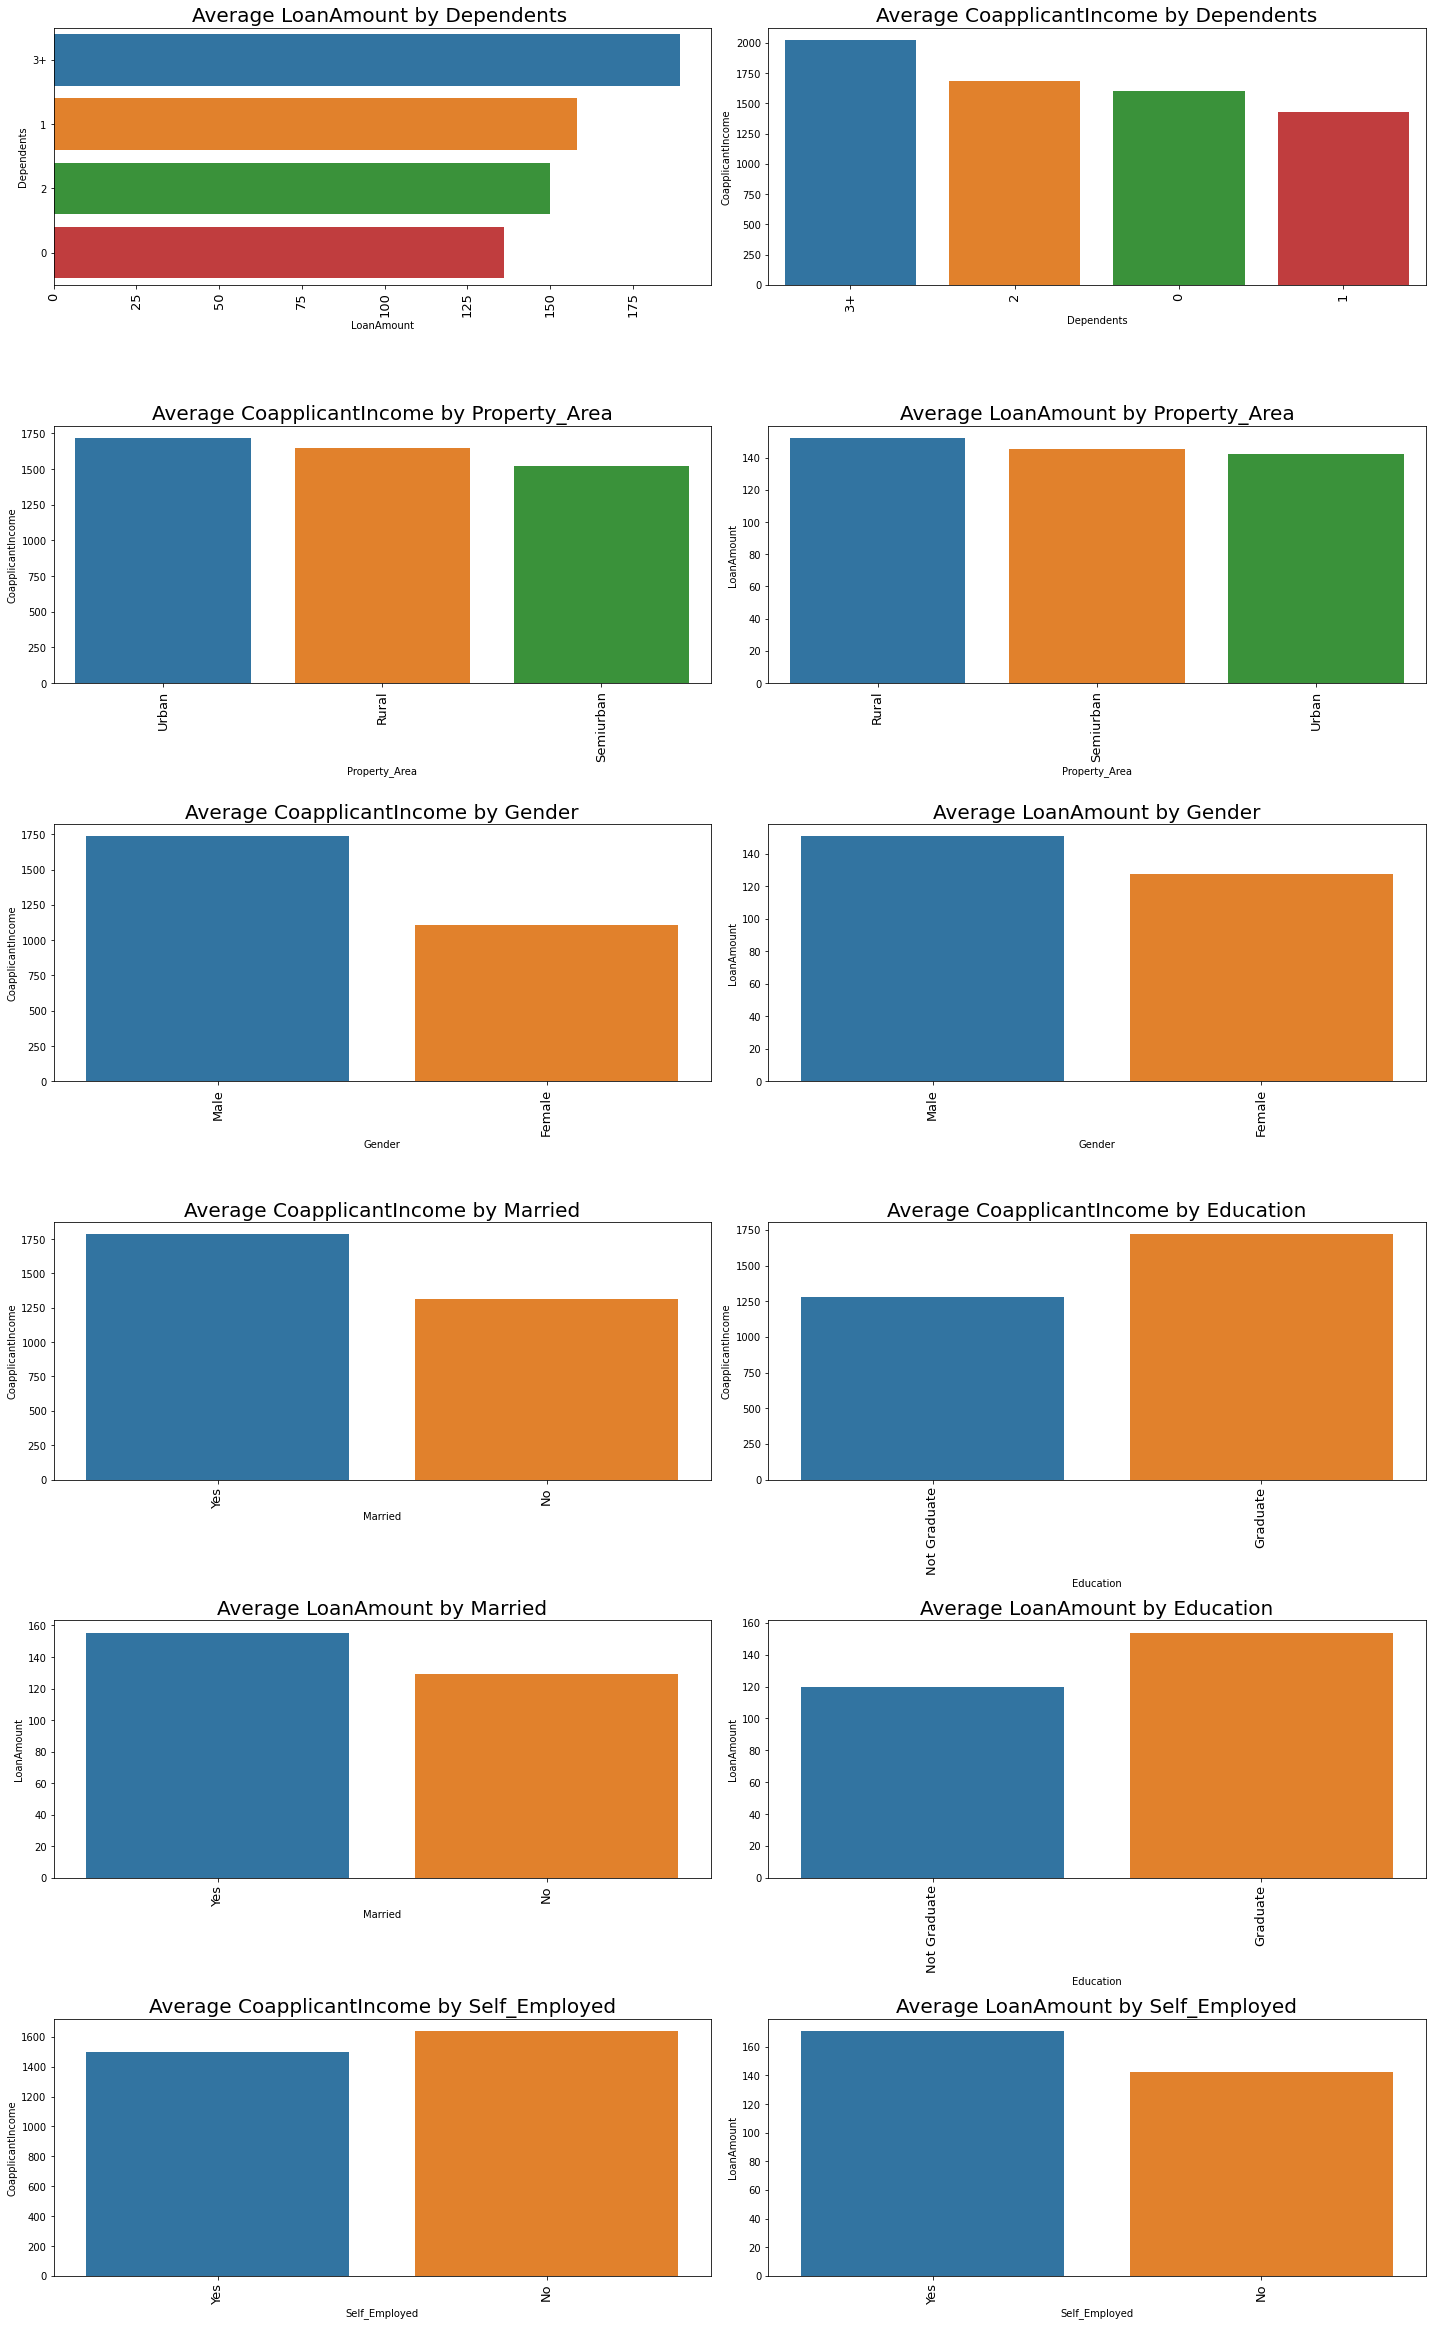

In [45]:
plt.figure(figsize=(20,65))
plt.subplot(12,2,1)
sns.barplot(y='Dependents',x='LoanAmount',data=data3.head(20))
plt.title("Average LoanAmount by Dependents ",fontsize=20)
plt.xticks(rotation=90,fontsize=13)
plt.subplot(12,2,2)
sns.barplot(x='Dependents',y='CoapplicantIncome',data=data4.head(20))
plt.title("Average CoapplicantIncome by Dependents",fontsize=20)
plt.xticks(rotation=90,fontsize=13)
plt.subplot(12,2,3)
sns.barplot(x='Property_Area',y='CoapplicantIncome',data=data5.head(20))
plt.title("Average CoapplicantIncome by Property_Area",fontsize=20)
plt.xticks(rotation=90,fontsize=13)
plt.subplot(12,2,4)
sns.barplot(x='Property_Area',y='LoanAmount',data=data6.head(20))
plt.title("Average LoanAmount by Property_Area",fontsize=20)
plt.xticks(rotation=90,fontsize=13)
plt.subplot(12,2,5)
sns.barplot(x='Gender',y='CoapplicantIncome',data=data7.head(20))
plt.title("Average CoapplicantIncome by Gender",fontsize=20)
plt.xticks(rotation=90,fontsize=13)
plt.subplot(12,2,6)
sns.barplot(x='Gender',y='LoanAmount',data=data8.head(20))
plt.title("Average LoanAmount by Gender",fontsize=20)
plt.xticks(rotation=90,fontsize=13)
plt.subplot(12,2,7)
sns.barplot(x='Married',y='CoapplicantIncome',data=data9.head(20))
plt.title("Average CoapplicantIncome by Married",fontsize=20)
plt.xticks(rotation=90,fontsize=13)
plt.subplot(12,2,8)
sns.barplot(x='Education',y='CoapplicantIncome',data=data11.head(20))
plt.title("Average CoapplicantIncome by Education",fontsize=20)
plt.xticks(rotation=90,fontsize=13)
plt.subplot(12,2,9)
sns.barplot(x='Married',y='LoanAmount',data=data10.head(20))
plt.title("Average LoanAmount by Married",fontsize=20)
plt.xticks(rotation=90,fontsize=13)
plt.subplot(12,2,10)
sns.barplot(x='Education',y='LoanAmount',data=data12.head(20))
plt.title("Average LoanAmount by Education",fontsize=20)
plt.xticks(rotation=90,fontsize=13)
plt.subplot(12,2,11)
sns.barplot(x='Self_Employed',y='CoapplicantIncome',data=data13.head(20))
plt.title("Average CoapplicantIncome by Self_Employed",fontsize=20)
plt.xticks(rotation=90,fontsize=13)
plt.subplot(12,2,12)
sns.barplot(x='Self_Employed',y='LoanAmount',data=data14.head(20))
plt.xticks(rotation=90,fontsize=13)
plt.title("Average LoanAmount by Self_Employed",fontsize=20)
plt.tight_layout()

#Obseravtion
From upper graph we can easily see the average value related to loanamount and coapplicantincome and applicanincome with all the features in dataset

In [46]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [47]:
from sklearn.preprocessing import OrdinalEncoder,StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score

In [48]:
oe=OrdinalEncoder()
def ordinal_transform(df,column):
  df[column]=oe.fit_transform(df[column])
  return df

**I am using ordianlencoder because all my columns have values in order**

In [49]:
data=ordinal_transform(data,['Gender','Married','Education','Self_Employed','Property_Area','Loan_Status'])

In [50]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0,0.0,0.0,5849,0.0,146.412162,360.0,1.0,2.0,1.0
1,1.0,1.0,1,0.0,0.0,4583,1508.0,128.000000,360.0,1.0,0.0,0.0
2,1.0,1.0,0,0.0,1.0,3000,0.0,66.000000,360.0,1.0,2.0,1.0
3,1.0,1.0,0,1.0,0.0,2583,2358.0,120.000000,360.0,1.0,2.0,1.0
4,1.0,0.0,0,0.0,0.0,6000,0.0,141.000000,360.0,1.0,2.0,1.0


In [51]:
data['Dependents']=data['Dependents'].replace({'3+':'3'})

In [52]:
data['Dependents']=data['Dependents'].astype(int)

In [53]:
X=data.drop(['Loan_Status'],axis=1)
y=data['Loan_Status']

In [54]:
x=X

In [55]:
X.dtypes

Gender               float64
Married              float64
Dependents             int64
Education            float64
Self_Employed        float64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area        float64
dtype: object

#Checking Outliers

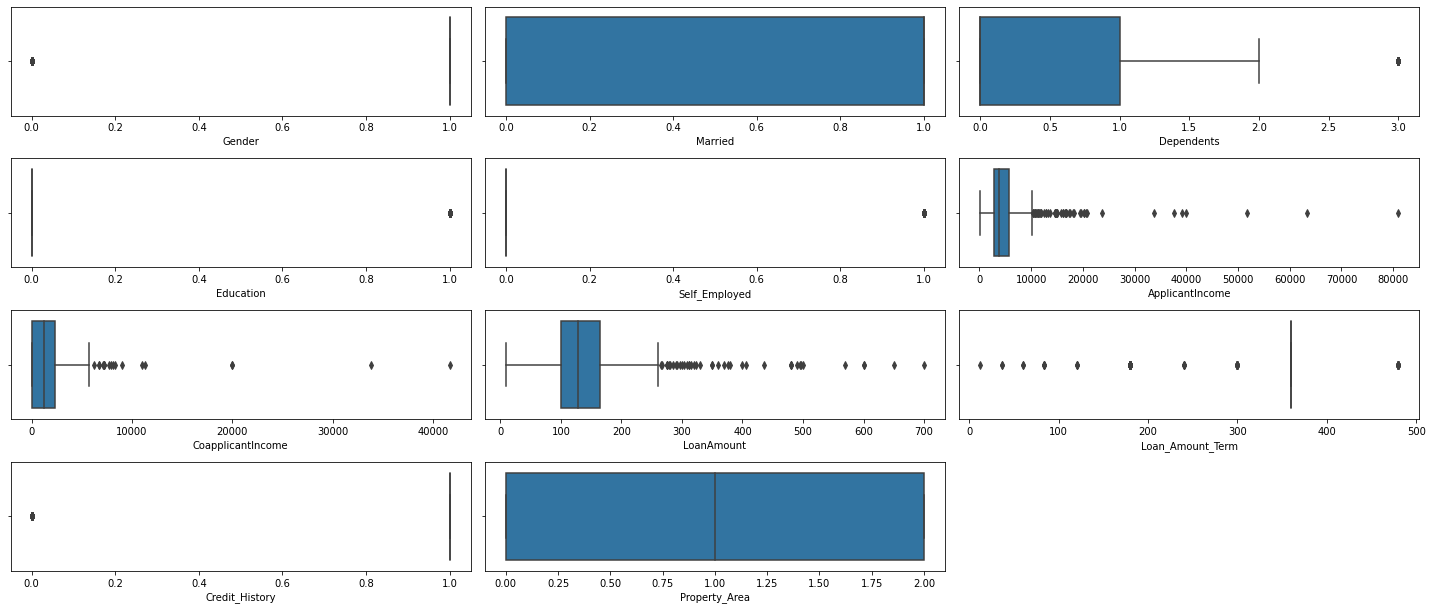

In [56]:
X_val=X.columns.values
plt.figure(figsize=(20,25))
for i in range(0,len(X_val)):
  plt.subplot(12,3,i+1)
  sns.boxplot(X[X_val[i]])
  plt.tight_layout()

*WE have many outliers lets remove them*

#Removing Outliers

In [57]:
for col in X.columns:
  percentile=X[col].quantile([0.01,0.98]).values
  X[col][X[col] <=percentile[0]]=percentile[0]
  X[col][X[col] >=percentile[1]]=percentile[1]

*Using percentile method to remove outliers because i have a small dataset i dont want to loose data*

#After removing outliers

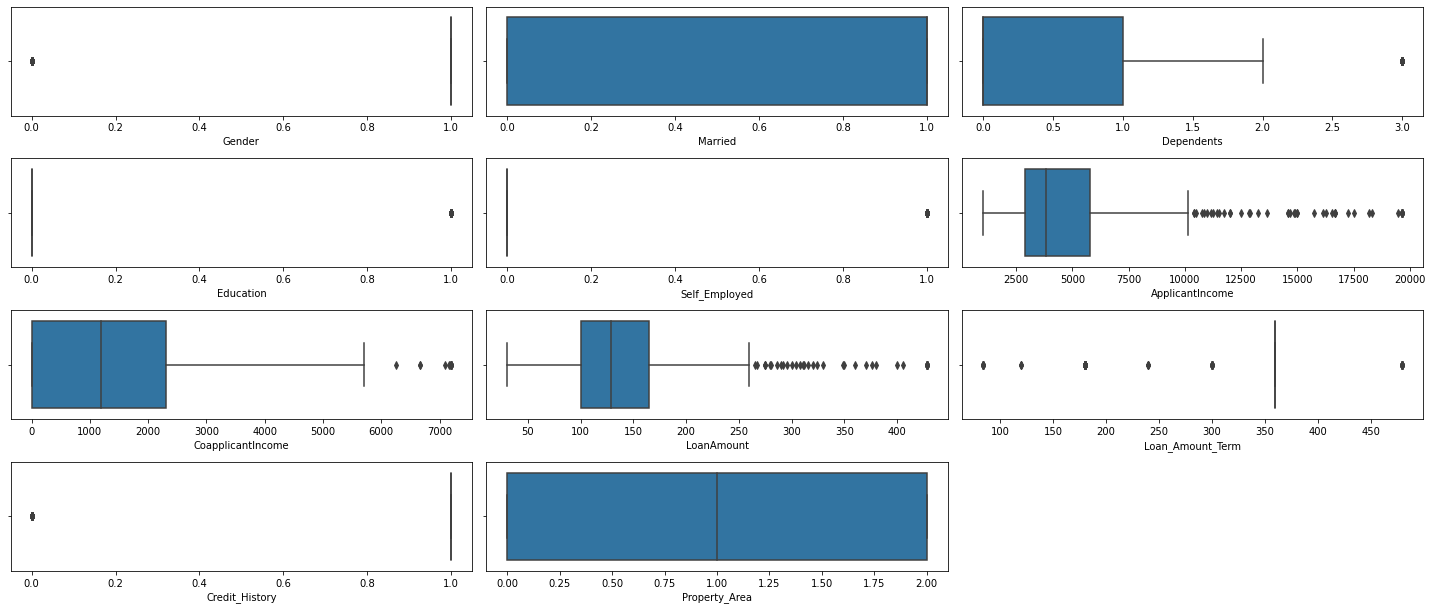

In [58]:
X_val=X.columns.values
plt.figure(figsize=(20,25))
for i in range(0,len(X_val)):
  plt.subplot(12,3,i+1)
  sns.boxplot(X[X_val[i]])
  plt.tight_layout()

*Outliers have been removed*

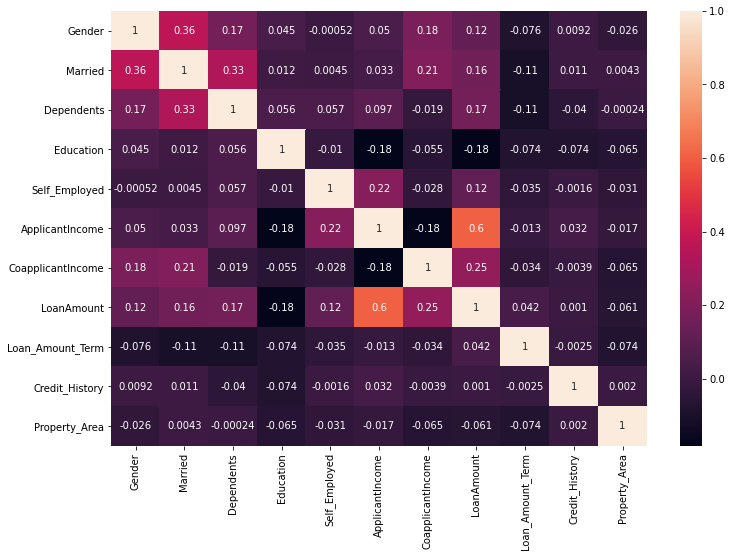

In [59]:
plt.figure(figsize=(12,8))
X_corr=X.corr()
sns.heatmap(X_corr,annot=True)

*From heatmap i can say we have some columns that have good correlation like applicantincome and loanamount married and we also have some columns that have less correlation*

#Balancing the data

In [60]:
smote=SMOTE(random_state=42)
X_res,y_res=smote.fit_resample(X,y)
X_new=pd.DataFrame(X_res,columns=x.columns)
y_new=pd.DataFrame(y_res,columns=['Loan_Status'])

*Plotting the difference between imbalanced and balanced data*

Text(0.5, 1.0, 'Balanced Data')

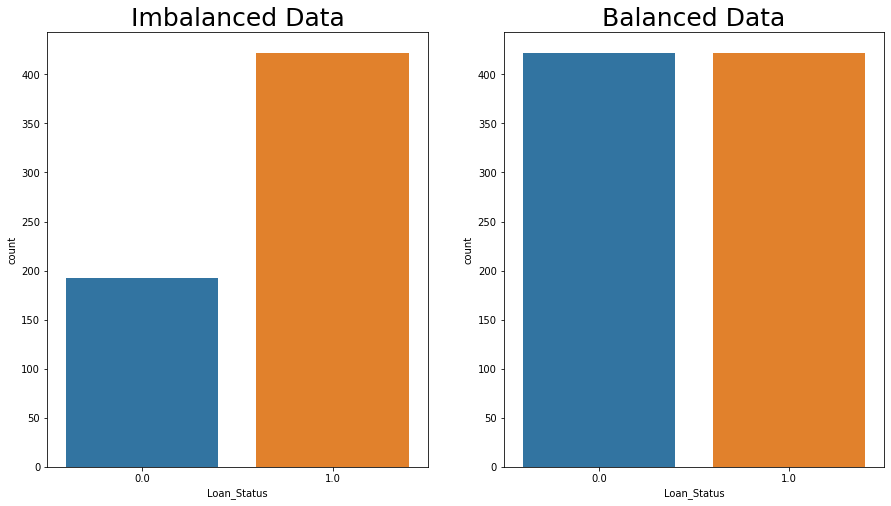

In [61]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
sns.countplot(y)
plt.title("Imbalanced Data",fontsize=25)
plt.subplot(1,2,2)
sns.countplot(y_new['Loan_Status'])
plt.title("Balanced Data",fontsize=25)

#Checking skewness

In [62]:
X_new.skew()

Gender              -1.644644
Married             -0.539699
Dependents           1.050865
Education            1.232360
Self_Employed        2.189560
ApplicantIncome      2.322111
CoapplicantIncome    1.286897
LoanAmount           1.849314
Loan_Amount_Term    -2.125274
Credit_History      -1.325004
Property_Area       -0.056966
dtype: float64

#Removing Skewness

In [63]:
from sklearn.preprocessing import power_transform
X_new=power_transform(X_new,method='yeo-johnson')
X_new=pd.DataFrame(X_new,columns=x.columns)

#After Removing Skewness

In [64]:
X_new.skew()

Gender              -1.408679
Married             -0.497079
Dependents           0.384438
Education            1.042668
Self_Employed        1.927853
ApplicantIncome     -0.016536
CoapplicantIncome   -0.090536
LoanAmount           0.002807
Loan_Amount_Term     0.395909
Credit_History      -1.135653
Property_Area       -0.151233
dtype: float64

#Feature Scaling

In [65]:
scaler=StandardScaler()
X_new=scaler.fit_transform(X_new)
X_new=pd.DataFrame(X_new,columns=x.columns)

*Using standardscaler to scaler all the values in data*

In [66]:
X_train,X_test,y_train,y_test=train_test_split(X_new,y_new,test_size=0.3,random_state=42)

In [67]:
from yellowbrick.classifier.rocauc import roc_auc

In [68]:
from sklearn.ensemble import ExtraTreesClassifier,RandomForestClassifier,GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
!pip install scikit-plot
import scikitplot as skplt
from sklearn.model_selection import GridSearchCV,StratifiedKFold,KFold

In [69]:
models={
    "GradientBoostingClassifier":GradientBoostingClassifier(),
    "ExtraTreesRegressor":ExtraTreesClassifier(),
    "RandomForestRegressor":RandomForestClassifier(),
    "XGBRegressor":XGBClassifier(),
    "LIGHTGBM":LGBMClassifier()
}

*************************************************** GradientBoostingClassifier ************************************************************


Accuracy_Score 0.7913385826771654


SCORE 0.7913385826771654


Confusion metrics


[[ 92  44]
 [  9 109]]
CLASSIFICATION REPORT


              precision    recall  f1-score   support

         0.0       0.91      0.68      0.78       136
         1.0       0.71      0.92      0.80       118

    accuracy                           0.79       254
   macro avg       0.81      0.80      0.79       254
weighted avg       0.82      0.79      0.79       254

Cross_Val_Score 0.8341293322062553


ROC AUC CURVE
MODEL LEARNING CURVE


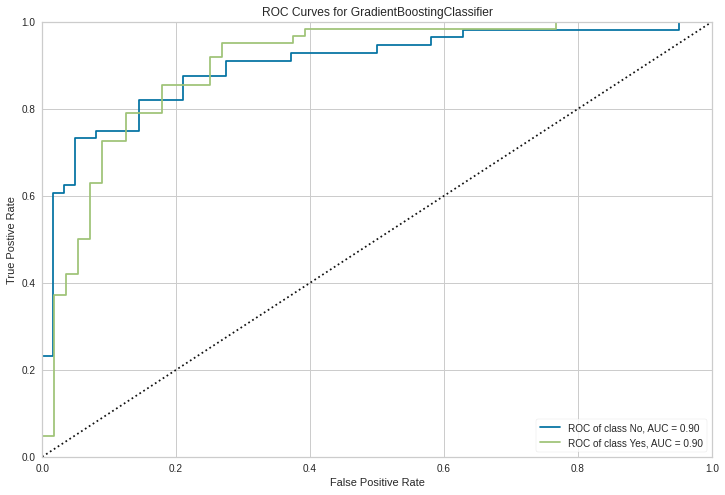

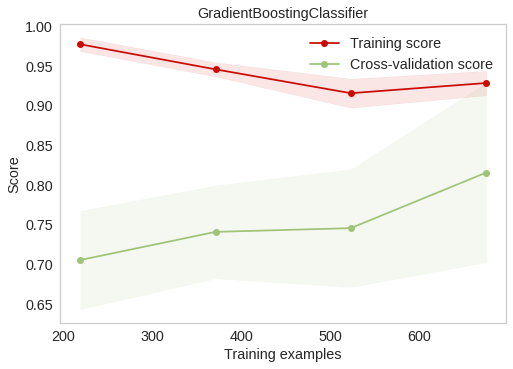

*************************************************** ExtraTreesRegressor ************************************************************


Accuracy_Score 0.7992125984251969


SCORE 0.7992125984251969


Confusion metrics


[[ 99  37]
 [ 14 104]]
CLASSIFICATION REPORT


              precision    recall  f1-score   support

         0.0       0.88      0.73      0.80       136
         1.0       0.74      0.88      0.80       118

    accuracy                           0.80       254
   macro avg       0.81      0.80      0.80       254
weighted avg       0.81      0.80      0.80       254

Cross_Val_Score 0.8412792335869259


ROC AUC CURVE
MODEL LEARNING CURVE


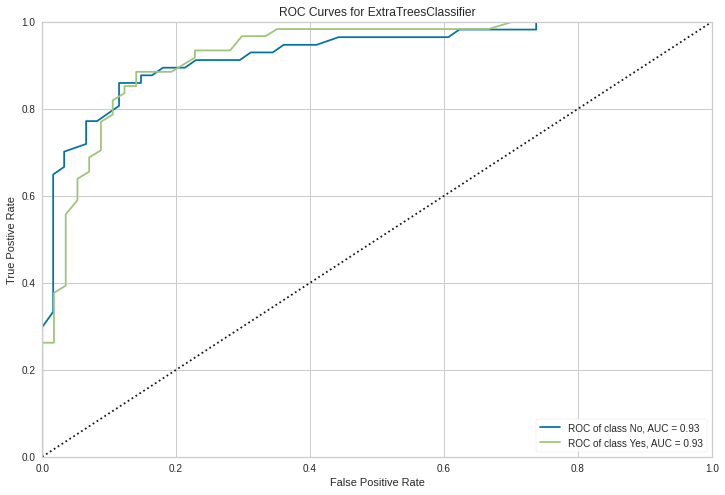

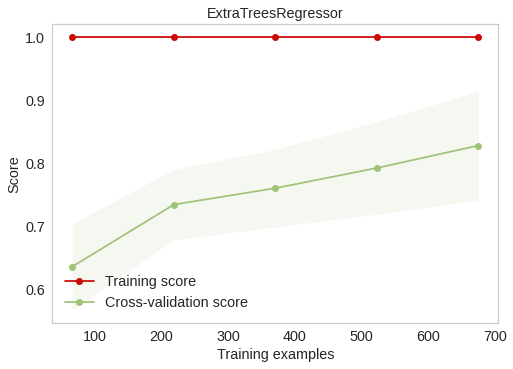

*************************************************** RandomForestRegressor ************************************************************


Accuracy_Score 0.8110236220472441


SCORE 0.8110236220472441


Confusion metrics


[[ 99  37]
 [ 11 107]]
CLASSIFICATION REPORT


              precision    recall  f1-score   support

         0.0       0.90      0.73      0.80       136
         1.0       0.74      0.91      0.82       118

    accuracy                           0.81       254
   macro avg       0.82      0.82      0.81       254
weighted avg       0.83      0.81      0.81       254

Cross_Val_Score 0.8412510566356719


ROC AUC CURVE
MODEL LEARNING CURVE


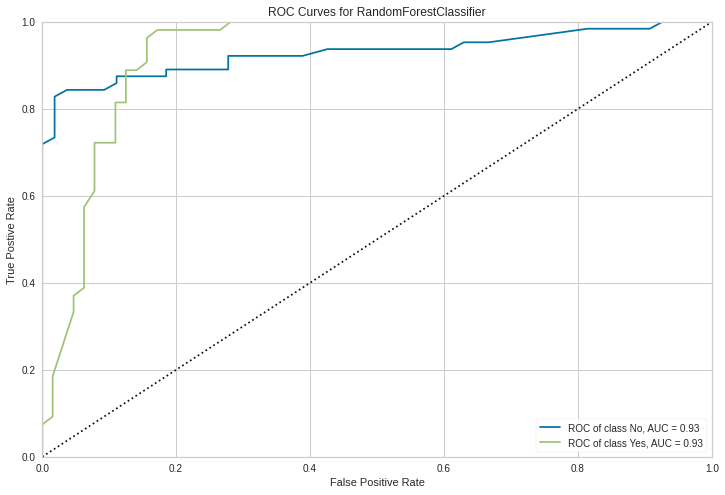

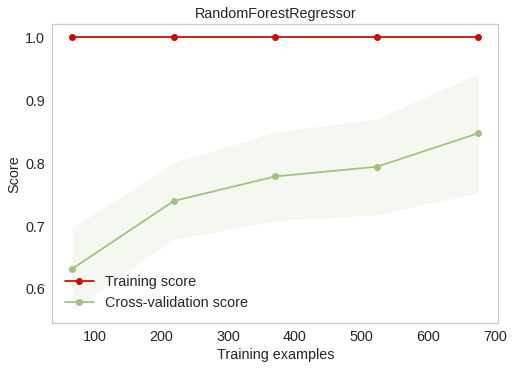

*************************************************** XGBRegressor ************************************************************


Accuracy_Score 0.7874015748031497


SCORE 0.7874015748031497


Confusion metrics


[[100  36]
 [ 18 100]]
CLASSIFICATION REPORT


              precision    recall  f1-score   support

         0.0       0.85      0.74      0.79       136
         1.0       0.74      0.85      0.79       118

    accuracy                           0.79       254
   macro avg       0.79      0.79      0.79       254
weighted avg       0.80      0.79      0.79       254

Cross_Val_Score 0.8388982812059735


ROC AUC CURVE
MODEL LEARNING CURVE


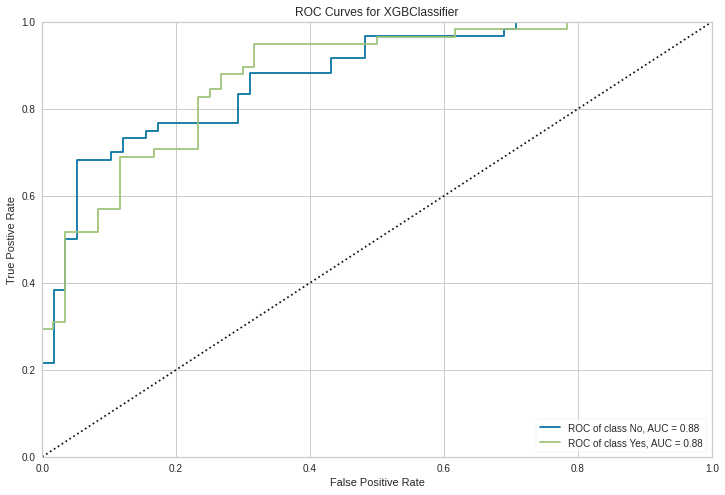

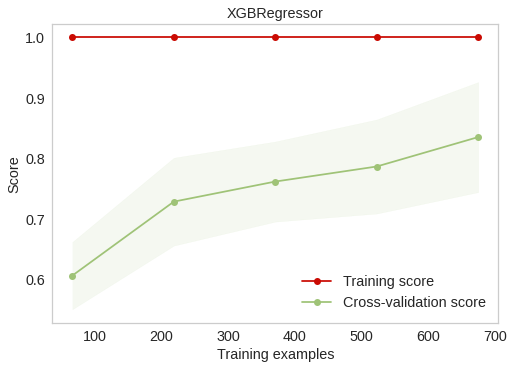

*************************************************** LIGHTGBM ************************************************************


Accuracy_Score 0.7952755905511811


SCORE 0.7952755905511811


Confusion metrics


[[100  36]
 [ 16 102]]
CLASSIFICATION REPORT


              precision    recall  f1-score   support

         0.0       0.86      0.74      0.79       136
         1.0       0.74      0.86      0.80       118

    accuracy                           0.80       254
   macro avg       0.80      0.80      0.80       254
weighted avg       0.80      0.80      0.80       254

Cross_Val_Score 0.8199492814877429


ROC AUC CURVE
MODEL LEARNING CURVE


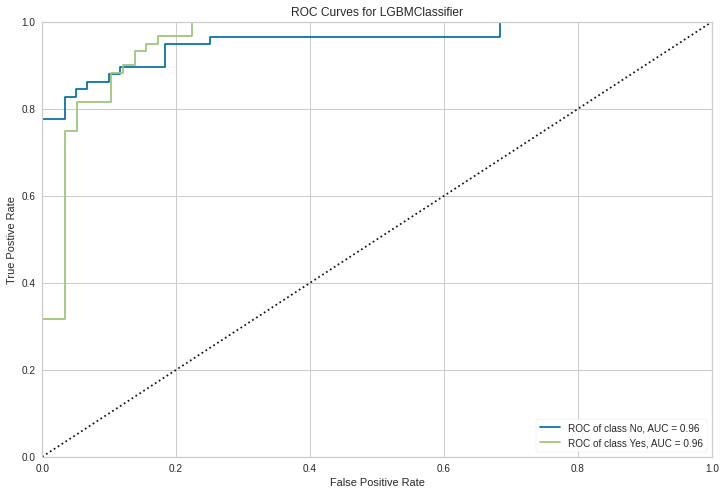

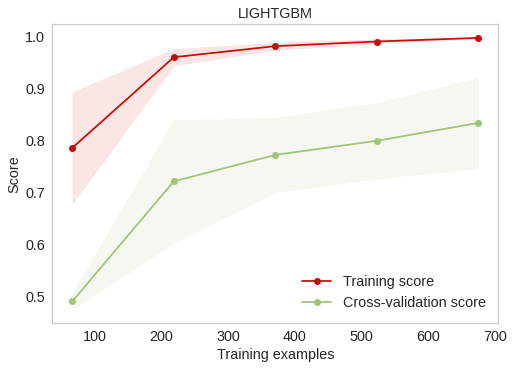

In [70]:
skf=StratifiedKFold(n_splits=5,shuffle=True)
Score=[]
CVS=[]
MODEL=[]
for name,model in models.items():
  print("***************************************************",name,"************************************************************")
  MODEL.append(name)
  model.fit(X_train,y_train)
  y_pred=model.predict(X_test)
  print('\n')
  ac=accuracy_score(y_test,y_pred)
  Score.append(ac)
  print("Accuracy_Score",ac)
  print('\n')
  print("SCORE",model.score(X_test,y_test))
  print("\n")
  cm=confusion_matrix(y_test,y_pred)
  print('Confusion metrics')
  print('\n')
  print(cm)
  print("CLASSIFICATION REPORT")
  report=classification_report(y_test,y_pred)
  print('\n')
  print(report)
  csv=cross_val_score(model,X_new,y_new,cv=skf).mean()
  CVS.append(csv*100)
  print("Cross_Val_Score",csv)
  print('\n')
  print("ROC AUC CURVE")
  plt.figure(figsize=(12,8))
  roc_auc(model,X_train,y_train,X_test=X_test,y_test=y_test,classes=['No','Yes'],micro=False,macro=False)
  print("MODEL LEARNING CURVE")
  skplt.estimators.plot_learning_curve(model,X_new,y_new,cv=5,scoring='accuracy',text_fontsize='large',title=name)
  plt.show()

**I will select randomforest because it is giving me good performance metrics as comapre to other**

In [71]:
rf=RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [72]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [73]:
param={'bootstrap': [True,False],
 'criterion': ['gini','entropy'],
 'max_depth': [None,1,2,3],
 'max_features': ['auto','sqrt','log2'],
 'max_samples': [None,1,2],
 'min_samples_leaf': [1,2],
 'min_samples_split': [2,1,3]
}

In [74]:
Grid=GridSearchCV(estimator=rf,param_grid=param,cv=skf,n_jobs=-1)

In [75]:
Grid.fit(X_new,y_new)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 1, 2, 3],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'max_samples': [None, 1, 2],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 1, 3]})

In [76]:
Grid.best_params_

{'bootstrap': True,
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': 'log2',
 'max_samples': None,
 'min_samples_leaf': 1,
 'min_samples_split': 3}

In [77]:
Grid.best_score_

0.8531346858269936

**Accuracy increased from 84.1 to 85.31**

*Now i will just put all the values of grid in randomforest just to plot roc_auc and to see learnign curve and foe matrics*

In [78]:
RF=RandomForestClassifier(bootstrap= True,
 criterion= 'entropy',
 max_depth= None,
 max_features= 'sqrt',
 max_samples= None,
 min_samples_leaf= 2,
 min_samples_split= 2)

ROC AUC CURVE
MODEL LEARNING CURVE


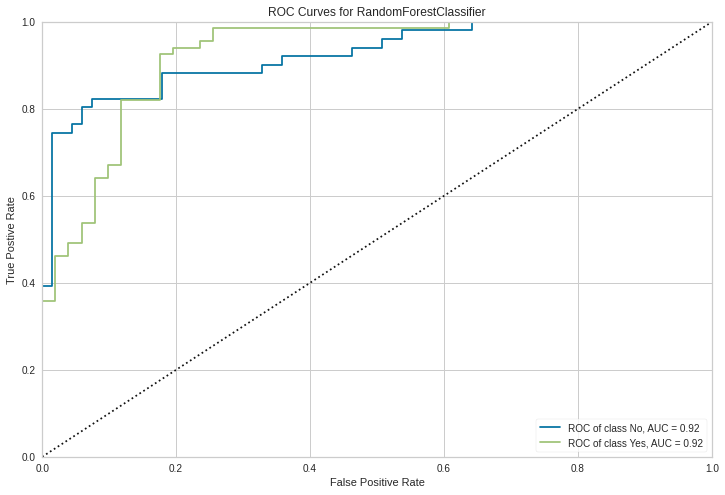

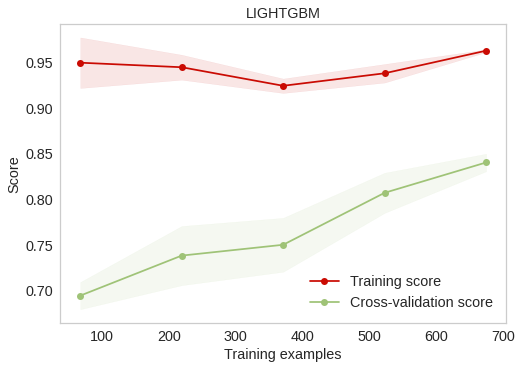

In [79]:
print("ROC AUC CURVE")
plt.figure(figsize=(12,8))
roc_auc(RF,X_train,y_train,X_test=X_test,y_test=y_test,classes=['No','Yes'],micro=False,macro=False)
print("MODEL LEARNING CURVE")
skplt.estimators.plot_learning_curve(RF,X_new,y_new,cv=skf,scoring='accuracy',text_fontsize='large',title=name)
plt.show()

#Final Model Matrics

In [80]:
RF.fit(X_train,y_train)
y_pred=RF.predict(X_test)
print("Accuracy_score",accuracy_score(y_test,y_pred))
print("Confusion Matrics")
print('\n')
print(confusion_matrix(y_test,y_pred))
print("Classification Report")
print('\n')
print(classification_report(y_test,y_pred))

Accuracy_score 0.8149606299212598
Confusion Matrics


[[ 95  41]
 [  6 112]]
Classification Report


              precision    recall  f1-score   support

         0.0       0.94      0.70      0.80       136
         1.0       0.73      0.95      0.83       118

    accuracy                           0.81       254
   macro avg       0.84      0.82      0.81       254
weighted avg       0.84      0.81      0.81       254



In [81]:
import joblib
joblib.dump(Grid,'Classifier.obj')

['Classifier.obj']

In [82]:
model=joblib.load('/content/Classifier.obj')

In [83]:
model.predict(X_test)

array([1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 1., 0.,
       1., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 1., 1., 0., 0., 1., 0.,
       0., 1., 0., 1., 0., 0., 1., 1., 1., 0., 0., 1., 0., 1., 0., 0., 1.,
       0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0.,
       0., 0., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0.,
       0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1.,
       1., 1., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 0.,
       0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1.,
       0., 1., 0., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1.,
       1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 0., 1.,
       0., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 1., 0., 0.,
       1., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0.,
       1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0.,
       1., 0., 1., 1., 1.

#Conclusion
1-In this data i have to made a model that can predict the the loan status like loan should be approved or not

2-i did eda to understand the effect ot features on my target column and to analyse many things 

3-in this data is was having the imbalance data so i balanced it by using upsampling smote

4-the dataset was very small if it might be large model could learn more and accuracy might also increased

5-finally i build a model that can predict loan status with 85% accuracy